### Import Libraries

In [15]:
import pandas as pd
import os

#### Task 1: Merging 12 months of sales data into a single file

In [25]:
df = pd.read_csv("./data/Sales_April_2019.csv")

files = [file for file in os.listdir("./data/")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)   

#### Read in updated dataframe

In [48]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


### Cleaning up Data

#### Drop rows of NaN

In [53]:
all_data = all_data.dropna(how='all')

In [62]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12


#### Find or delete

In [65]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]

### Augment data with additional columns

#### Task 2: Add Month Column and converting to int

In [66]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12


#### Task 3: Add a Sales column

In [78]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.drop(columns=["Unnamed: 0"],inplace=True)

### Question 1: What was the best month for sales? How much was earned that month?

In [85]:
results = all_data.groupby("Month").sum()

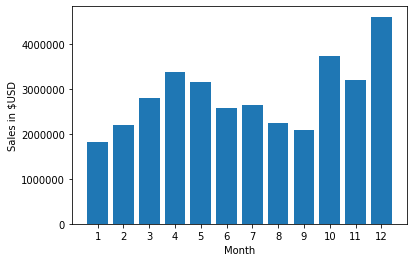

In [95]:
import matplotlib.pyplot as plt
import datetime

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in $USD")
plt.xlabel("Month")
plt.show()

#### Task 4: Create City Column

In [125]:
all_data["City & State"] = (all_data["Purchase Address"]).apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(" ")[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City & State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


### Question 2: What city had the highest number of sales?

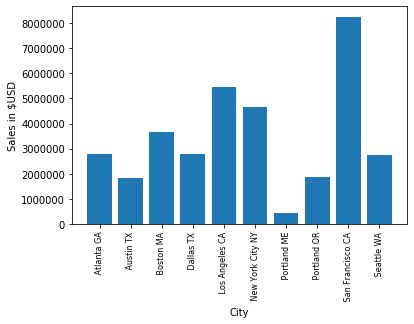

In [134]:
results = all_data.groupby("City & State").sum()

city = [city for city, df in all_data.groupby("City & State")]

plt.bar(city, results['Sales'])
plt.xticks(city, rotation ='vertical',size = 8)
plt.ylabel("Sales in $USD")
plt.xlabel("City")
plt.show()

### Question 3: What time should we display advertisements to miximize likelihood of customers buying product?

In [135]:
all_data['Order Date'] = pd.to_datetime(all_data["Order Date"])

In [140]:
all_data['Hour'] = all_data["Order Date"].dt.hour
all_data['Minute'] = all_data["Order Date"].dt.minute

In [141]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City & State,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


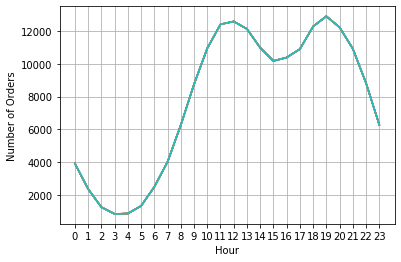

In [148]:
hours = [hour for hour , df in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()

### Question 4: What products are most often sold together?

In [155]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[["Order ID", "Grouped"]].drop_duplicates()

df.head(100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
2297,297847,"iPhone,Lightning Charging Cable"
2345,297894,"USB-C Charging Cable,AA Batteries (4-pack)"
2347,297895,"USB-C Charging Cable,27in FHD Monitor"
2398,297945,"Vareebadd Phone,USB-C Charging Cable,Bose Soun..."


In [166]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think so?

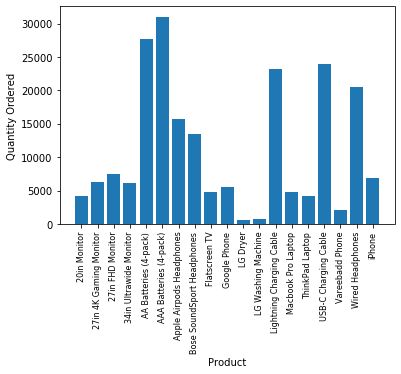

In [179]:
product_group = all_data.groupby("Product")
product_group.sum()
quantity_order = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]
plt.bar(products, quantity_order)
plt.xticks(products, rotation ='vertical',size = 8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.show()

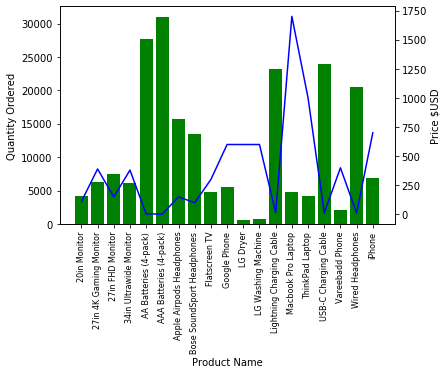

In [192]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_order, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Price $USD")
ax1.set_xticklabels(products, rotation='vertical', size = 8)

plt.show()